<a href="https://colab.research.google.com/github/REZ-OAN/pythonForMl/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name : Pias Datta Purkayestha
# ID : 369899

#Importing Libraries

In [3]:
"""
<----------Author---------->

   Name :  Pias Datta Purkayestha
   ID : 369899

"""

## These imports provide the necessary tools and functions for
# data preprocessing, model training, evaluation, and visualization

#For Data Processing and Visualizing

import pandas as pd
#It provides data structures and data analysis tools.
#It's commonly used to handle and manipulate tabular data.


import matplotlib.pyplot as plt
#It is used for creating visualizations and plots in Python.

import numpy as np
#It provides support for arrays, matrices, and mathematical functions


from sklearn.impute import SimpleImputer
#It is used to impute missing values in datasets

import seaborn as sns
#Is is built  based on Matplotlib and provides additional functions
#to create more visually appealing statistical plots


from scipy import stats
#It provides various statistical functions and distributions.

from sklearn import preprocessing
#It is used for data preprocessing tasks like scaling, encoding


from sklearn.preprocessing import StandardScaler
#It is used to standardize features by removing
# the mean and scaling to unit variance.


from sklearn.preprocessing import OneHotEncoder
#used for one-hot encoding categorical variables


from sklearn.utils.class_weight import compute_class_weight
#used to compute class weights for imbalanced datasets.


from sklearn import tree
#This module contains classes and functions related to decision tree-based
# algorithms, which are commonly used for classification
# and regression tasks in machine learning. It generates the depth tree

from sklearn.metrics import RocCurveDisplay
# used for ROC curve analysis and visualization.

## Models
from sklearn.linear_model import LogisticRegression
#used to create a logistic regression classifier model.

from sklearn.tree import DecisionTreeClassifier
#used to create a Decision Tree Model

from sklearn.ensemble import RandomForestClassifier
#used to create a random forest model

from sklearn.neighbors import KNeighborsClassifier
#used to create a KNN model

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# used for hyperparameter tuning using randomized search
# and grid search cross-validation.


## Model evaluators

from sklearn.model_selection import train_test_split, cross_val_score
# used to split a dataset into training and testing subsets.

from sklearn.metrics import accuracy_score,roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc

from sklearn.metrics import confusion_matrix
# It provides a detailed breakdown of how well a model's predictions
# match the actual labels in a classification problem.

from sklearn.metrics import classification_report
#used to generate a text-based summary of classification performance

#Loading The DataSet

In [4]:
# loading data to pandas dataframe
df= pd.read_csv("/content/strokedataset.csv")
print(df.shape)

(5110, 12)


#Overview Of the Data Set Before Preprocessing

In [5]:
#overview of the data before any processing
# from first 10 sample
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [6]:
#from last 10 sample
df.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


#Dataset Balance Check

In [7]:
## counting the stroke column values
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<Axes: >

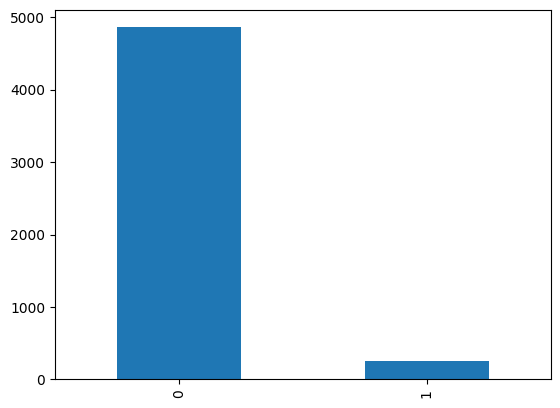

In [8]:
## plotting the stroke column counts
df["stroke"].value_counts().plot(kind="bar")
# this shows that our dataset is imbalanced

#Information About Dataset

In [9]:
## showing information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#Handling The Missing Or Null Values

In [10]:
#checking for the null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
# Handling missing data through Imputation (Replacing with the Mean in this case)
imputer = SimpleImputer(missing_values = np.NaN, strategy='mean')
# replace the nulls with mean of this column
df['bmi'] = imputer.fit_transform(df['bmi'].astype('float').values.reshape(-1,1))


In [12]:
## make sure the null values are removed or fixed
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#Overview After Remove or Replace The Null values in the dataset

In [13]:
# overview of the data after removing the null values
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [14]:
## information about the dataset after removing the null or missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#Encoding Categorical Data

In [15]:
# Label Encoding
label_encoder = preprocessing.LabelEncoder()

df['sex'] = label_encoder.fit_transform(df['gender'])
## printing the label mapping
label_mapping = dict(zip(df['sex'], df['gender']))
## print in sorted order
print('For sex Column')
print(dict(sorted(label_mapping.items(), key=lambda item: item[1])));

df['married'] = label_encoder.fit_transform(df['ever_married'])
## printing the label mapping
label_mapping = dict(zip(df['married'], df['ever_married']))
## print in sorted order
print('For married Column')
print(dict(sorted(label_mapping.items(), key=lambda item: item[1])));

df['employment'] = label_encoder.fit_transform(df['work_type'])
## printing the label mapping
label_mapping = dict(zip(df['employment'], df['work_type']))
## print in sorted order
print('For employment Column')
print(dict(sorted(label_mapping.items(), key=lambda item: item[1])));

df['residency'] = label_encoder.fit_transform(df['Residence_type'])
## printing the label mapping
label_mapping = dict(zip(df['residency'], df['Residence_type']))
## print in sorted order
print('For residency Column')
print(dict(sorted(label_mapping.items(), key=lambda item: item[1])));

df['smoker'] = label_encoder.fit_transform(df['smoking_status'])
## printing the label mapping
label_mapping = dict(zip(df['smoker'], df['smoking_status']))
## print in sorted order
print('For smoker Column')
print(dict(sorted(label_mapping.items(), key=lambda item: item[1])));

#  Removing the  unnecessary and same meaning columns
df = df.drop(['id','gender','ever_married','work_type','Residence_type', 'smoking_status'], axis=1)

# overview of the data after label encoding and removing the unnecessary columns
df

For sex Column
{0: 'Female', 1: 'Male', 2: 'Other'}
For married Column
{0: 'No', 1: 'Yes'}
For employment Column
{0: 'Govt_job', 1: 'Never_worked', 2: 'Private', 3: 'Self-employed', 4: 'children'}
For residency Column
{0: 'Rural', 1: 'Urban'}
For smoker Column
{0: 'Unknown', 1: 'formerly smoked', 2: 'never smoked', 3: 'smokes'}


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,sex,married,employment,residency,smoker
0,67.0,0,1,228.69,36.600000,1,1,1,2,1,1
1,61.0,0,0,202.21,28.893237,1,0,1,3,0,2
2,80.0,0,1,105.92,32.500000,1,1,1,2,0,2
3,49.0,0,0,171.23,34.400000,1,0,1,2,1,3
4,79.0,1,0,174.12,24.000000,1,0,1,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,0,1,2,1,2
5106,81.0,0,0,125.20,40.000000,0,0,1,3,1,2
5107,35.0,0,0,82.99,30.600000,0,0,1,3,0,2
5108,51.0,0,0,166.29,25.600000,0,1,1,2,0,1


In [16]:
unique_counts = df.nunique()

# Display the unique value counts of each columns
print(unique_counts)

age                   104
hypertension            2
heart_disease           2
avg_glucose_level    3979
bmi                   419
stroke                  2
sex                     3
married                 2
employment              5
residency               2
smoker                  4
dtype: int64


#Visualizing Data by comparison among Columns

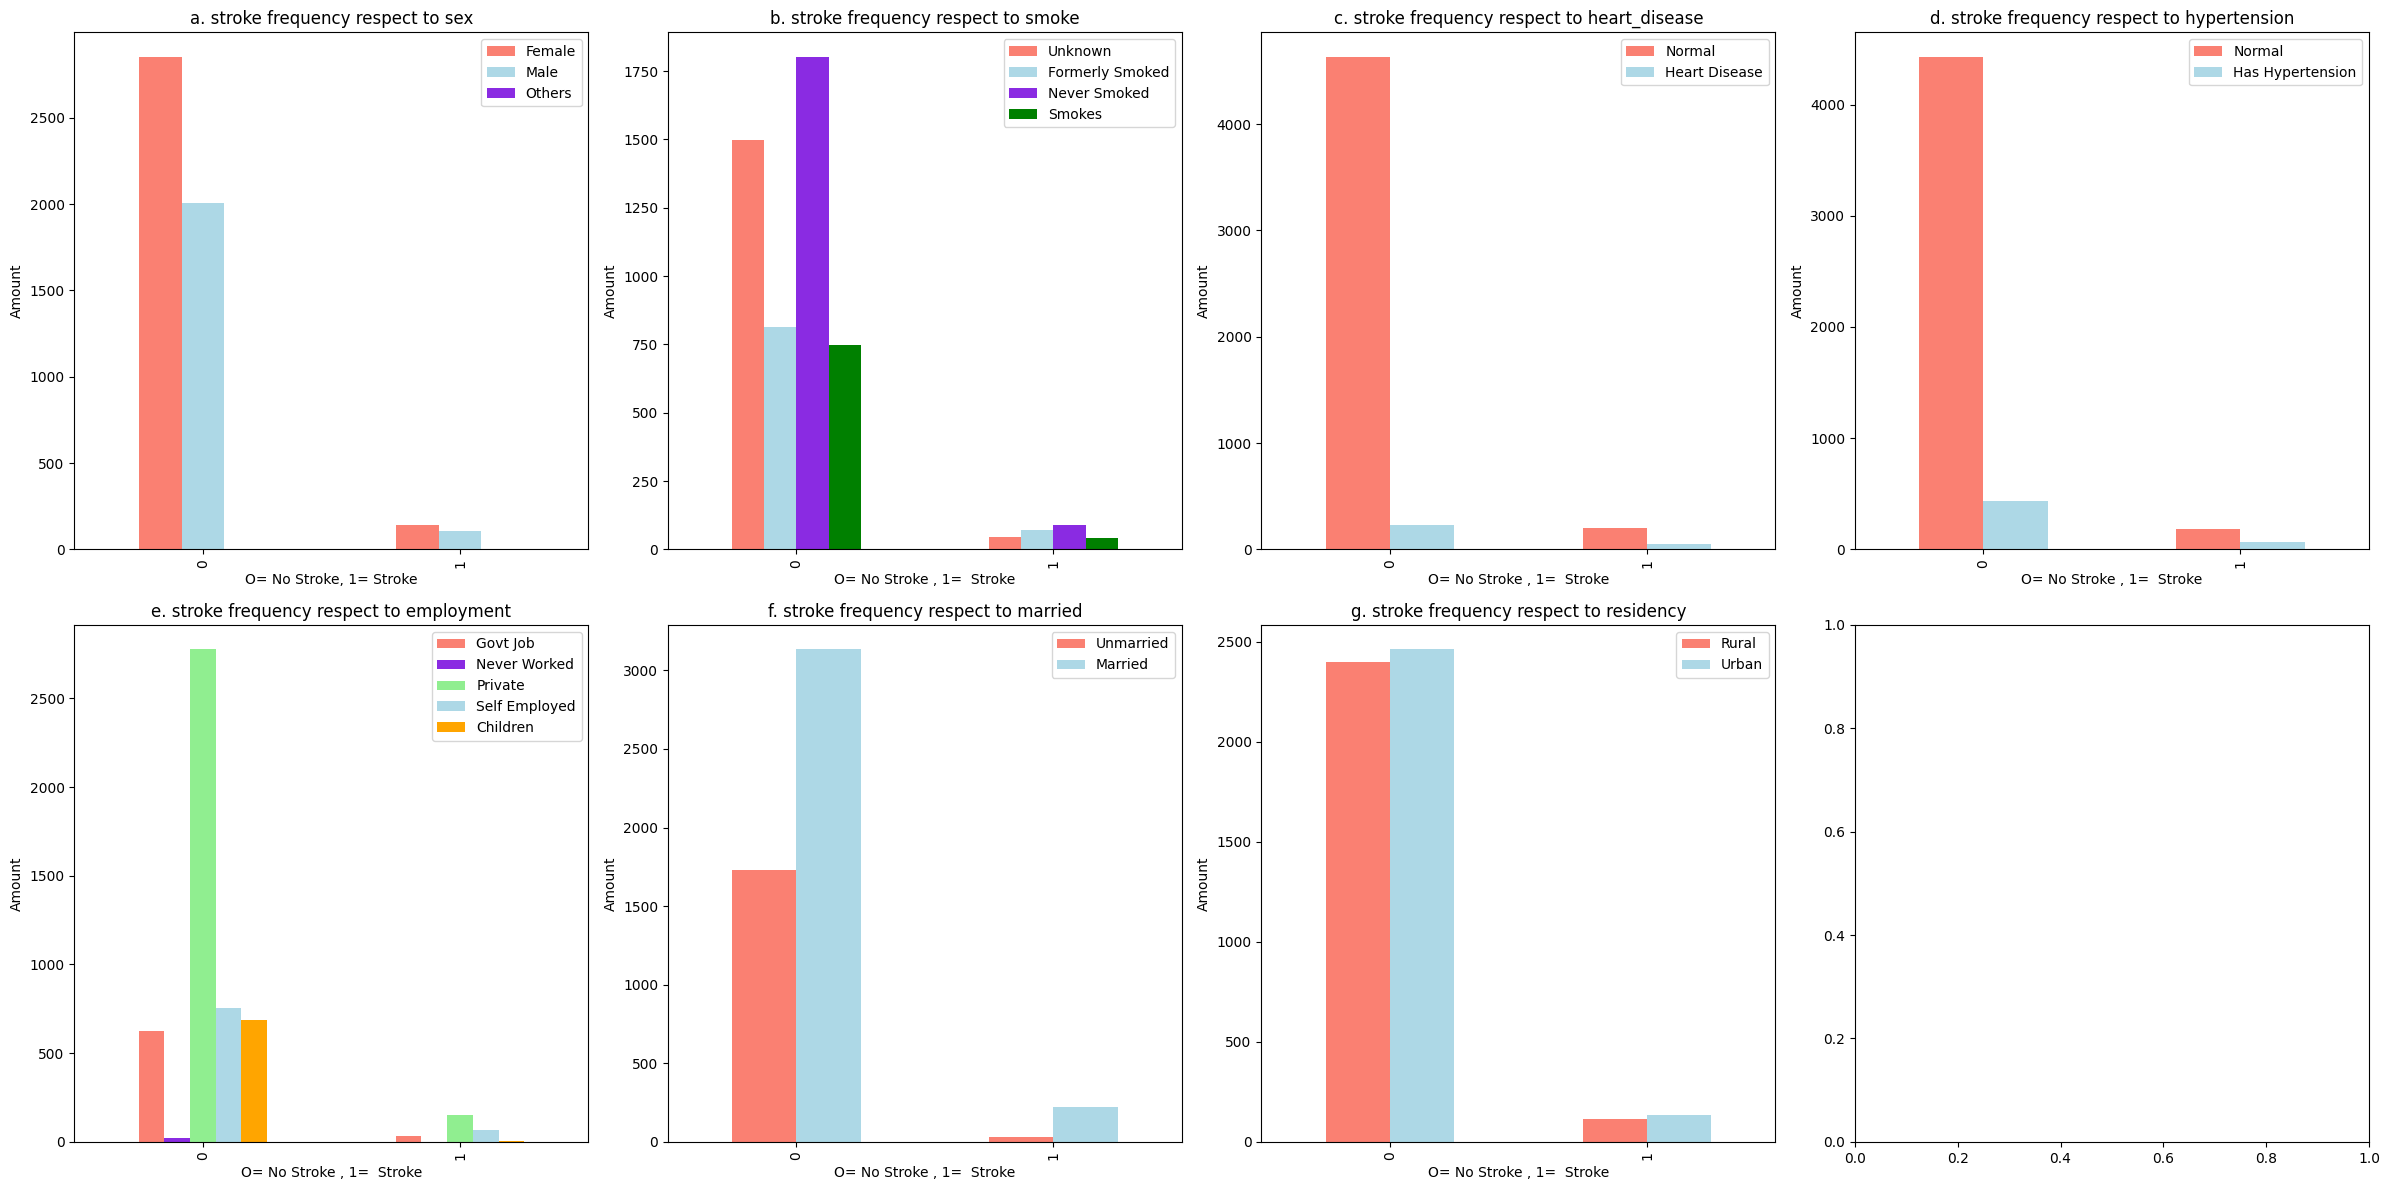

In [17]:

## plotting the comparisons from the dataset
fig, axs = plt.subplots(2, 4, figsize=(24,12))

# Compare stroke with sex column
pd.crosstab(df.stroke, df.sex).plot(kind="bar", color=["salmon", "lightblue", 'blueviolet'], ax=axs[0, 0])
axs[0, 0].set_title("a. stroke frequency respect to sex")
axs[0, 0].set_xlabel("O= No Stroke, 1= Stroke")
axs[0, 0].set_ylabel("Amount")
axs[0, 0].legend(["Female", "Male", "Others"])


# Compare stroke with smoker column
pd.crosstab(df.stroke,df.smoker).plot(kind="bar",color=["salmon","lightblue",'blueviolet','green'],ax = axs[0,1])
axs[0,1].set_title("b. stroke frequency respect to smoke")
axs[0,1].set_xlabel("O= No Stroke , 1=  Stroke")
axs[0,1].set_ylabel("Amount")
axs[0,1].legend(["Unknown", "Formerly Smoked", "Never Smoked" , "Smokes"])


#Compare stroke with heart_disease column
pd.crosstab(df.stroke,df.heart_disease).plot(kind="bar",color=['salmon','lightblue'],ax = axs[0,2])
axs[0,2].set_title("c. stroke frequency respect to heart_disease")
axs[0,2].set_xlabel("O= No Stroke , 1=  Stroke")
axs[0,2].set_ylabel("Amount")
axs[0,2].legend(["Normal", "Heart Disease"])

#Compare stroke with hypertension column
pd.crosstab(df.stroke,df.hypertension).plot(kind="bar",color=['salmon','lightblue'],ax = axs[0,3])
axs[0,3].set_title("d. stroke frequency respect to hypertension")
axs[0,3].set_xlabel("O= No Stroke , 1=  Stroke")
axs[0,3].set_ylabel("Amount")
axs[0,3].legend(["Normal", "Has Hypertension"])

#Compare stroke with employment column
pd.crosstab(df.stroke,df.employment).plot(kind="bar",color=['salmon','blueviolet','lightgreen','lightblue','orange'],ax = axs[1,0])
axs[1,0].set_title("e. stroke frequency respect to employment")
axs[1,0].set_xlabel("O= No Stroke , 1=  Stroke")
axs[1,0].set_ylabel("Amount")
axs[1,0].legend(["Govt Job", "Never Worked", "Private", "Self Employed", "Children"])

#Compare stroke with married column
pd.crosstab(df.stroke,df.married).plot(kind="bar",color=['salmon','lightblue'],ax = axs[1,1])
axs[1,1].set_title("f. stroke frequency respect to married")
axs[1,1].set_xlabel("O= No Stroke , 1=  Stroke")
axs[1,1].set_ylabel("Amount")
axs[1,1].legend(["Unmarried", "Married"])

#Compare stroke with residency column
pd.crosstab(df.stroke,df.residency).plot(kind="bar",color=['salmon','lightblue'],ax = axs[1,2])
axs[1,2].set_title("g. stroke frequency respect to residency")
axs[1,2].set_xlabel("O= No Stroke , 1=  Stroke")
axs[1,2].set_ylabel("Amount")
axs[1,2].legend(["Rural", "Urban"])


# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the combined plot
plt.show()

#Histogram Of age, bmi, avg_glucose_level Columns They has many Unique values

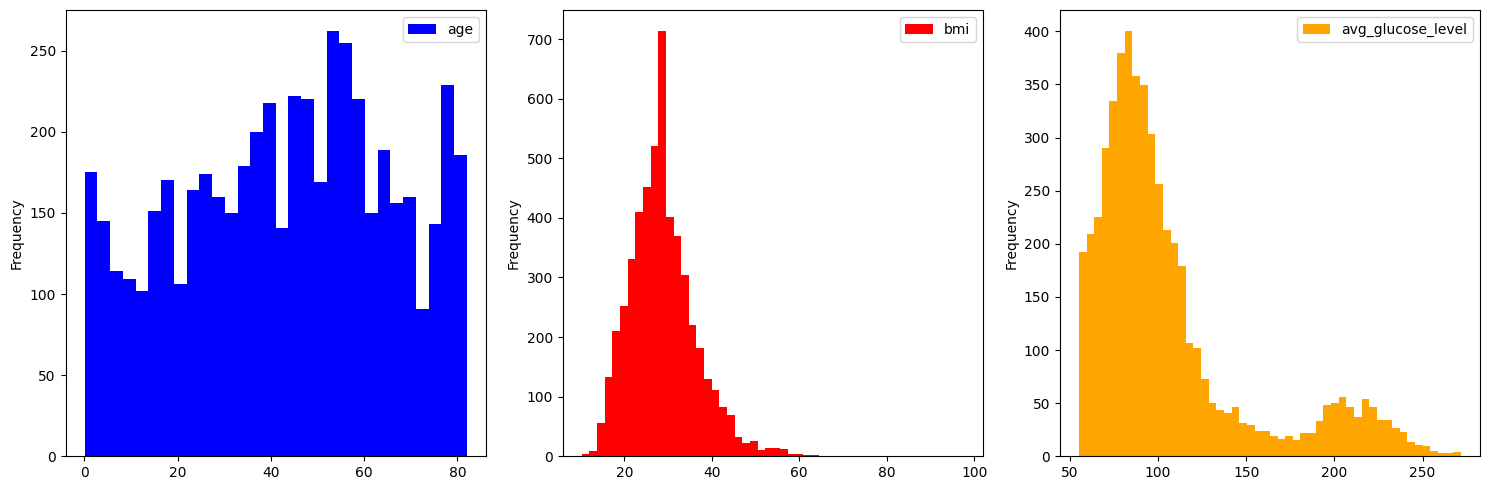

In [18]:
# Set the figure size and create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# Plot histogram for age on the first subplot
df.plot(kind="hist", y="age", bins=30, color="b", ax=axes[0])

# Plot histogram for bmi on the second subplot
df.plot(kind="hist", y="bmi", bins=50, color="r", ax=axes[1])

# Plot histogram for avg_glucose_level on the third subplot
df.plot(kind="hist", y="avg_glucose_level", bins=50, color="orange", ax=axes[2])

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Display the plots
plt.show()

#Statistical Information About The Dataset

In [19]:
# statistical measure of dataset before scaling using transpose method
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00
sex,5110.0,0.414286,0.493044,0.00,0.000,0.000,1.00,2.00
married,5110.0,0.656164,0.475034,0.00,0.000,1.000,1.00,1.00
employment,5110.0,2.167710,1.090293,0.00,2.000,2.000,3.00,4.00
residency,5110.0,0.508023,0.499985,0.00,0.000,1.000,1.00,1.00


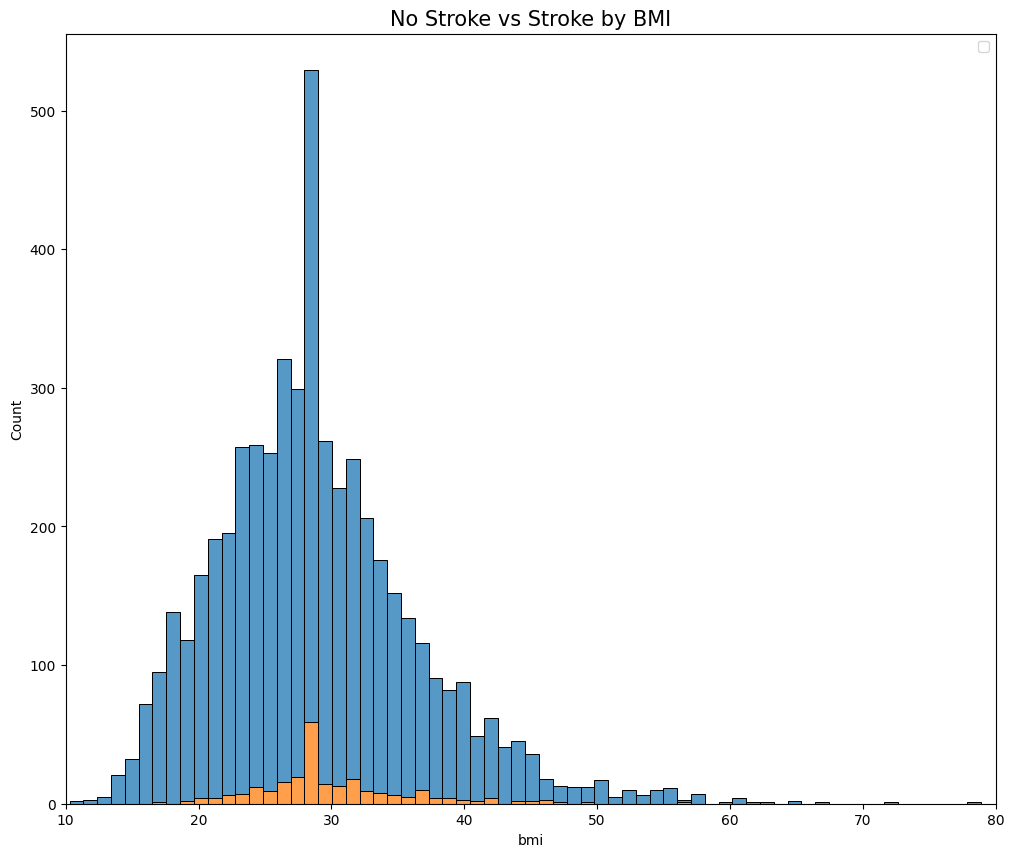

In [20]:
# Set the figure size
plt.figure(figsize=(12,10))

# Create a distribution plot using seaborn for the 'bmi' column in the 'df' data frame, separated by stroke status
sns.histplot(data=df, x="bmi", hue="stroke", element="bars",multiple="stack",fill=True)

# Set the plot title, x-axis limit and show the plot
plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,80])
plt.legend()
plt.show()


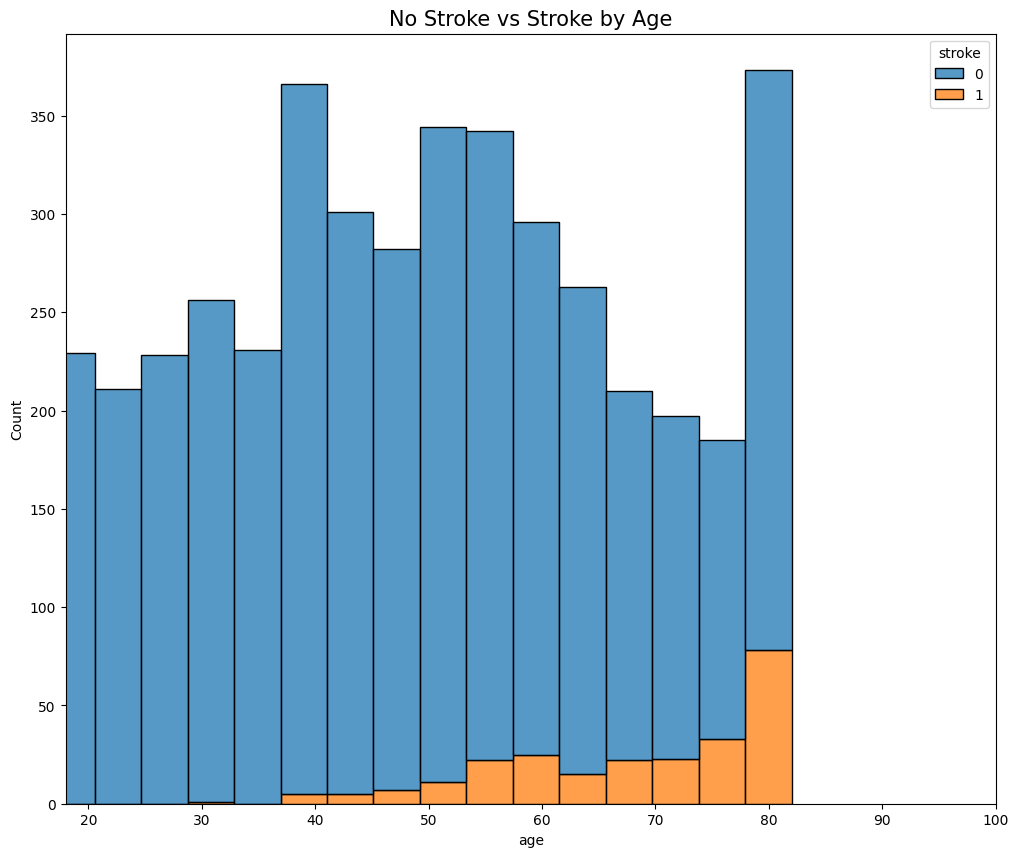

In [21]:
# Set the figure size
plt.figure(figsize=(12,10))

# Create a distribution plot using seaborn for the 'age' column in the 'df' data frame, separated by stroke status
sns.histplot(data=df, x="age", hue="stroke", element="bars",multiple="stack",fill=True)

# Set the plot title, x-axis limit and show the plot
plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,100])

plt.show()


#Visualize Correlation among Columns

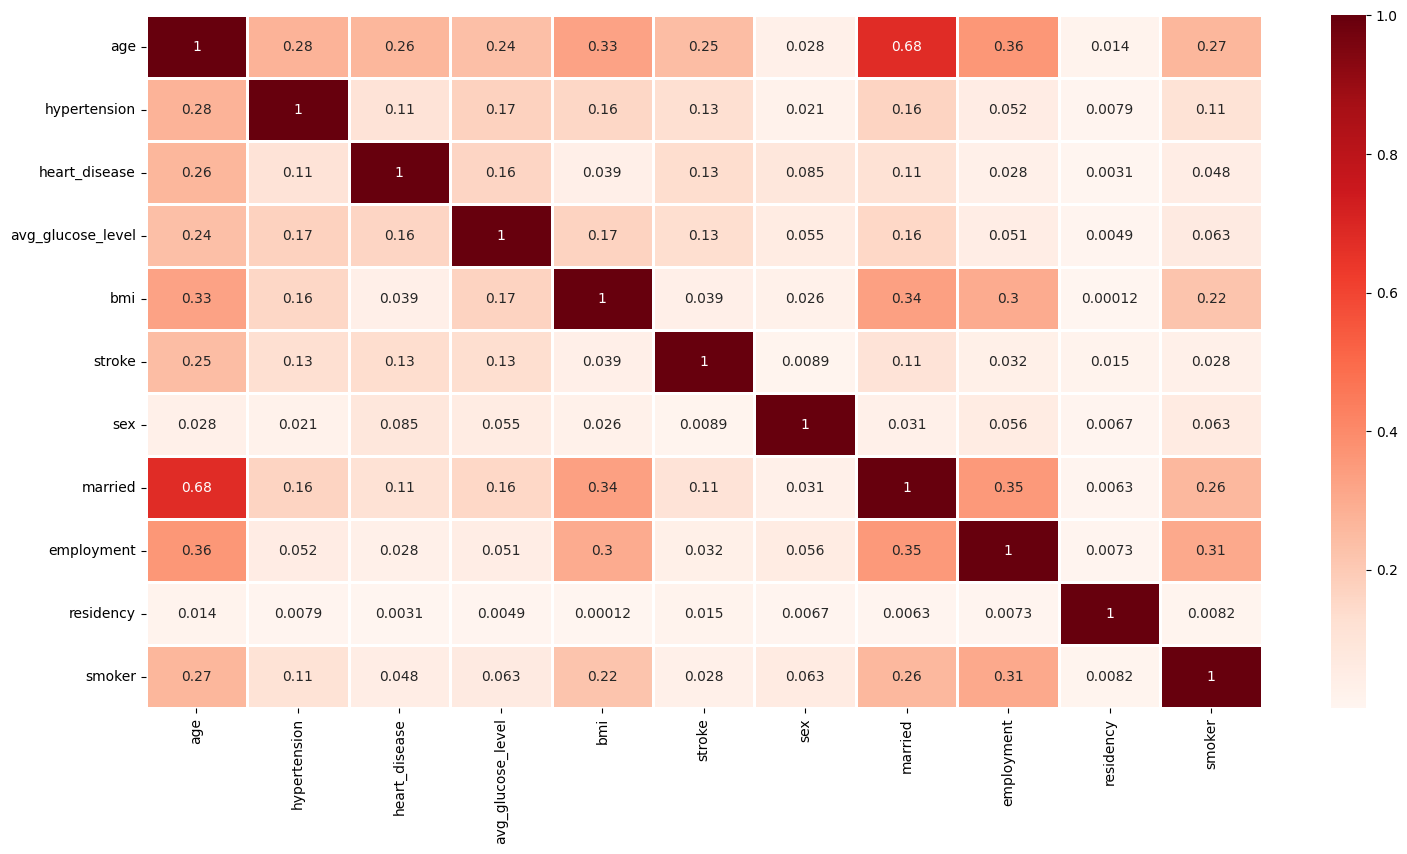

In [22]:

# Visualize Correlation matrix and visualize as heatmap
plt.figure(figsize=(18,9))
corr=abs(df.corr())
sns.heatmap(corr,annot=True,linewidth=1,cmap="Reds")
plt.show()


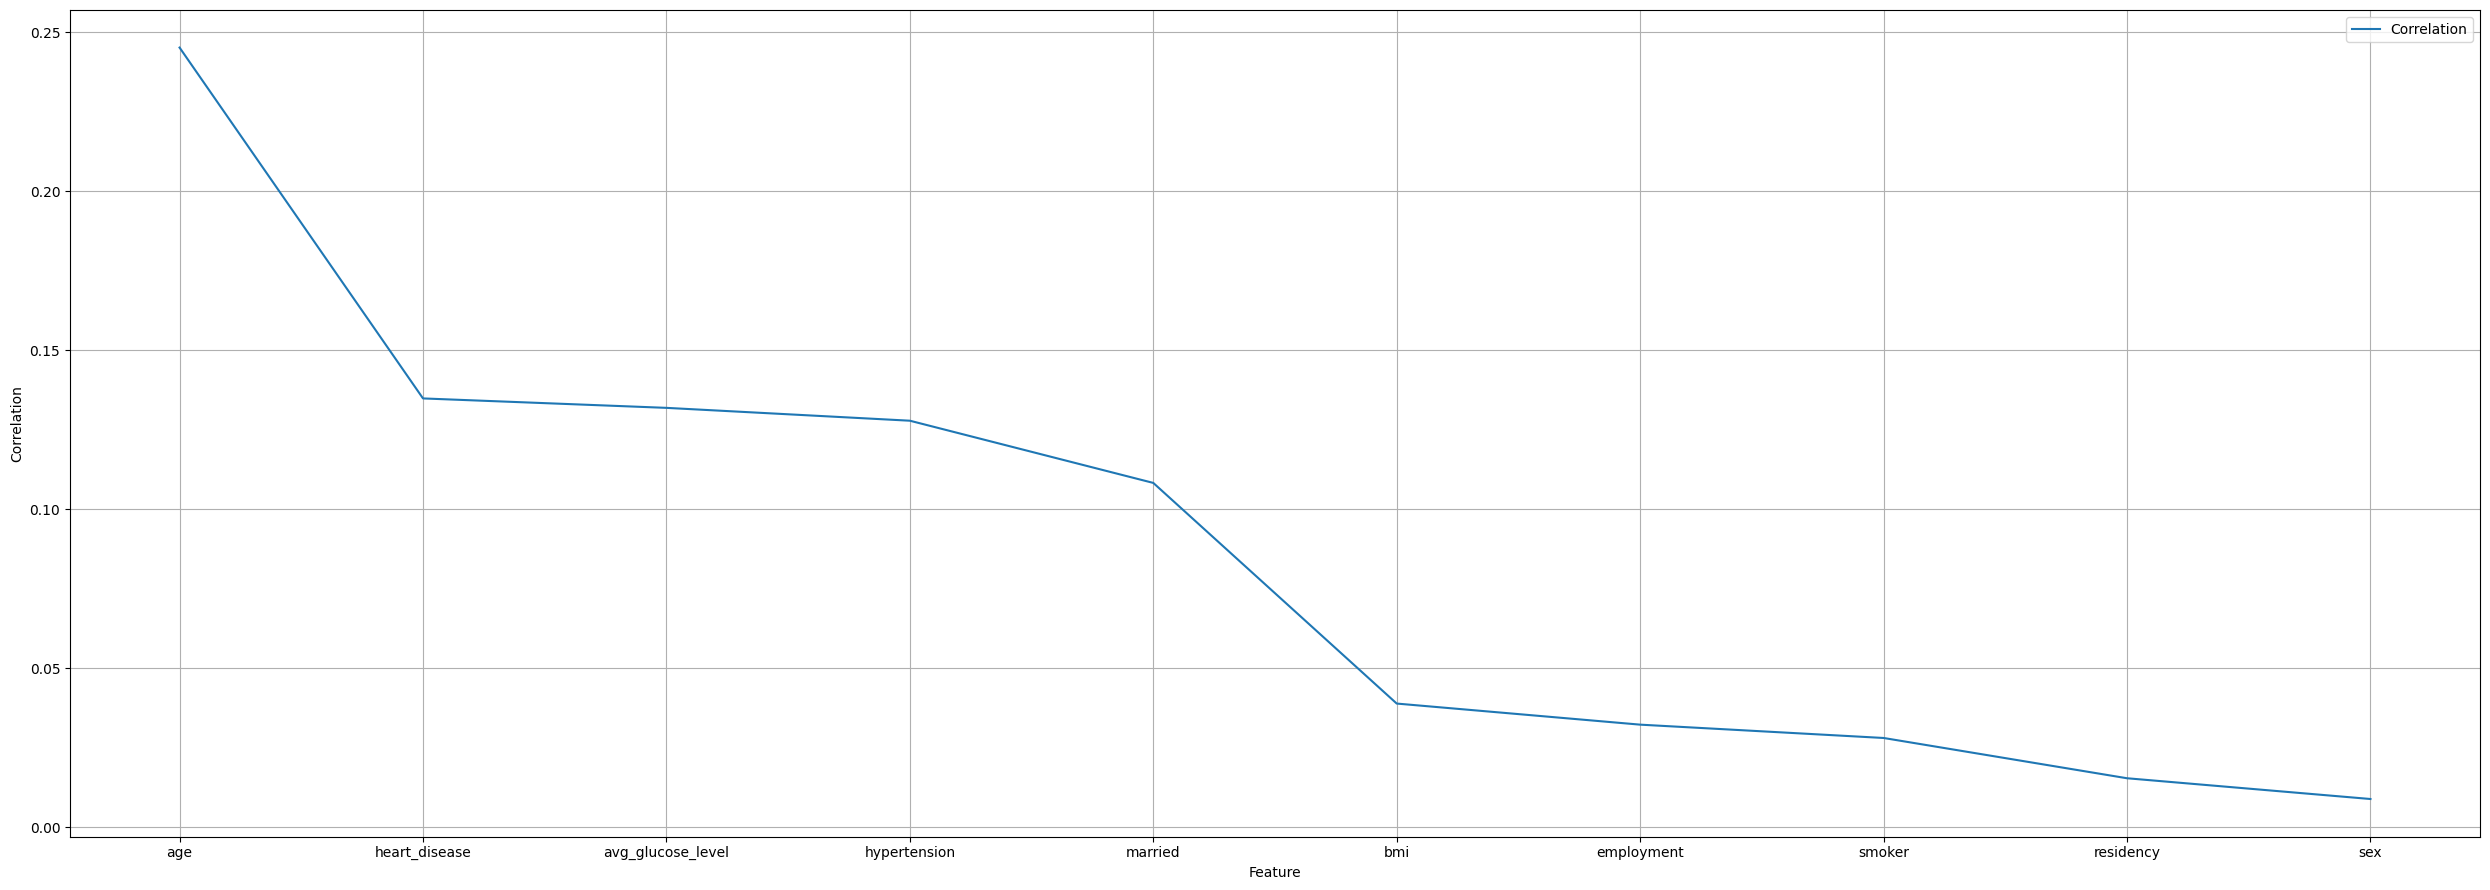

In [23]:
# Plot feature correlations with target variable in our case stroke
plt.figure(figsize=(25,9))
plt.plot(corr["stroke"].sort_values(ascending=False)[1:],label="Correlation")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Scaling Data of the dataset

In [24]:
# Initialize a StandardScaler object
scaler = StandardScaler()

# Define the list of numeric columns to scale
numeric_cols = ['age', 'avg_glucose_level', 'bmi']

# Scale the numeric columns in the 'df' dataframe using
#the 'fit_transform' method of the StandardScaler object
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [25]:
# statistical measure of the data set after scaling
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,5.005781e-17,1.000098,-1.908261,-0.806115,0.078432,0.786070,1.714845
hypertension,5110.0,9.745597e-02,0.296607,0.000000,0.000000,0.000000,0.000000,1.000000
heart_disease,5110.0,5.401174e-02,0.226063,0.000000,0.000000,0.000000,0.000000,1.000000
avg_glucose_level,5110.0,1.001156e-16,1.000098,-1.126958,-0.638322,-0.314995,0.175408,3.657145
bmi,5110.0,2.224791e-17,1.000098,-2.415564,-0.661694,-0.064080,0.507552,8.926127
stroke,5110.0,4.872798e-02,0.215320,0.000000,0.000000,0.000000,0.000000,1.000000
sex,5110.0,4.142857e-01,0.493044,0.000000,0.000000,0.000000,1.000000,2.000000
married,5110.0,6.561644e-01,0.475034,0.000000,0.000000,1.000000,1.000000,1.000000
employment,5110.0,2.167710e+00,1.090293,0.000000,2.000000,2.000000,3.000000,4.000000
residency,5110.0,5.080235e-01,0.499985,0.000000,0.000000,1.000000,1.000000,1.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   avg_glucose_level  5110 non-null   float64
 4   bmi                5110 non-null   float64
 5   stroke             5110 non-null   int64  
 6   sex                5110 non-null   int64  
 7   married            5110 non-null   int64  
 8   employment         5110 non-null   int64  
 9   residency          5110 non-null   int64  
 10  smoker             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


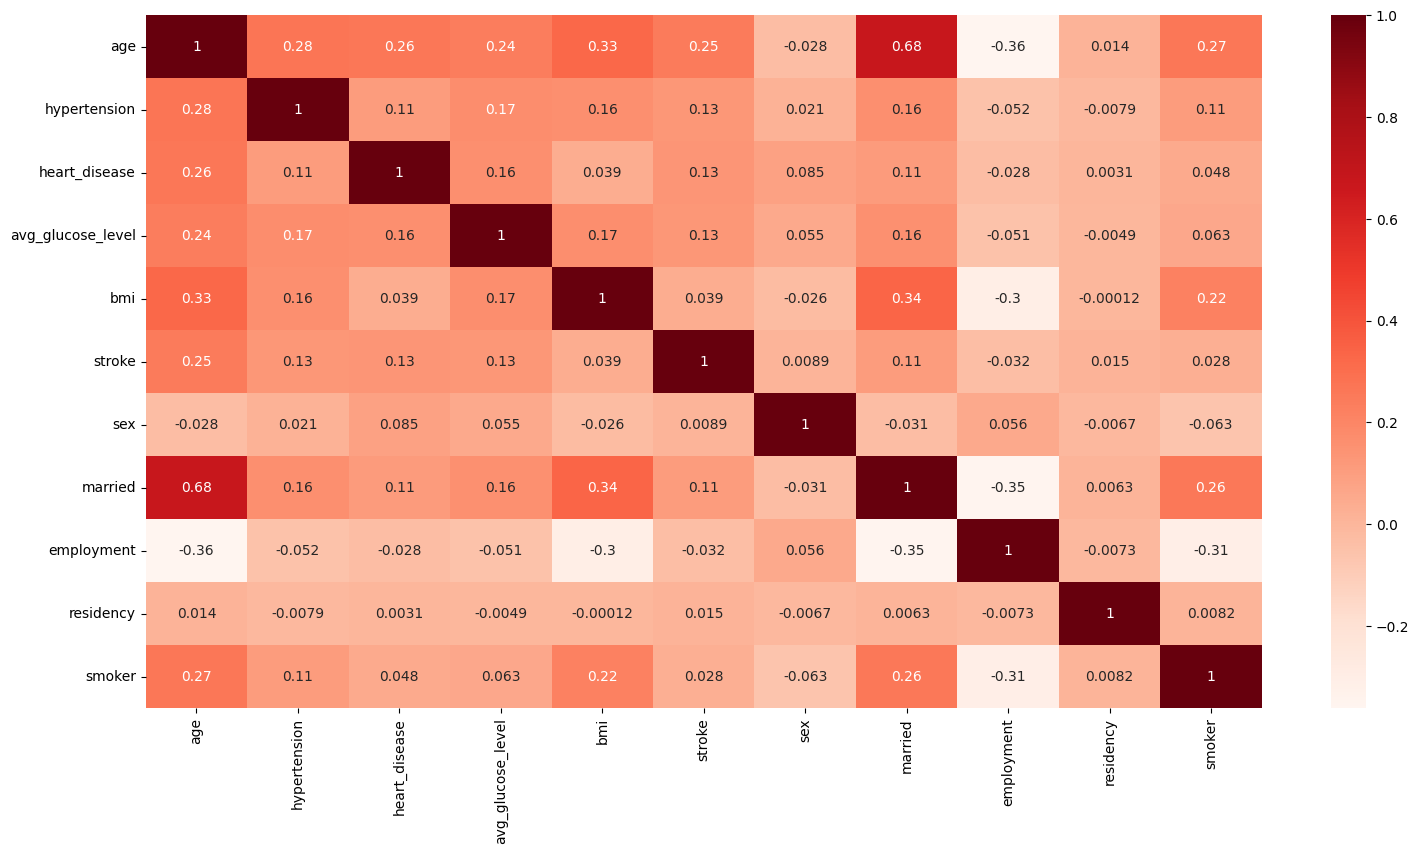

In [27]:
# Apply Corelation Matrix After preprocessing of the data

plt.figure(figsize=(18,9))
ax = sns.heatmap(df.corr(), annot=True,cmap="Reds")
plt.show()

#Creating A Function That Filter the Correlated Features That Can affect in prediction

In [28]:
# Define a function that takes a dataset and a threshold value as inputs and
#returns the set of all names of correlated columns
def correlation(dataset, threshold):
    # Initialize an empty set to store the names of correlated columns
    col_corr = set()

    # Calculate the correlation matrix for the dataset using the 'corr' method
    corr_matrix = dataset.corr()

    # Iterate over the columns of the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # Check if the absolute value of the correlation coefficient is greater than the threshold
            if abs(corr_matrix.iloc[i, j]) > threshold:
                # If it is, add the name of the column to the set of correlated columns
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    # Return the set of correlated column names
    return col_corr

In [29]:
## finding correlated features
x = df.drop('stroke',axis=1)
corr_features = correlation(x, 0.40)

#Removing Correlated Features

In [30]:
## remove correlated features
X_corr = x.drop(corr_features,axis=1)
X_corr

,age,hypertension,heart_disease,avg_glucose_level,bmi,sex,employment,residency,smoker
0,1.051434,0,1,2.706375,1.001234e+00,1,2,1,1
1,0.786070,0,0,2.121559,4.615554e-16,0,3,0,2
2,1.626390,0,1,-0.005028,4.685773e-01,1,2,0,2
3,0.255342,0,0,1.437358,7.154182e-01,0,2,1,3
4,1.582163,1,0,1.501184,-6.357112e-01,0,3,0,2
...,...,...,...,...,...,...,...,...,...
5105,1.626390,1,0,-0.494658,4.615554e-16,0,2,1,2
5106,1.670617,0,0,0.420775,1.442949e+00,0,3,1,2
5107,-0.363842,0,0,-0.511443,2.217363e-01,0,3,0,2
5108,0.343796,0,0,1.328257,-4.278451e-01,1,2,0,1


#Splitting the Data From Dataset For Train and Test

In [31]:
# create the target vector
y = df['stroke']

# drop the 'Stroke' column from the DataFrame to create the feature matrix
X = df.drop('stroke', axis=1)

"""
  splitting the data set into train and test data  where 70% of the data used
  for train the model and 30% data is used for test the model
"""
# split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_corr, y, test_size=0.45, stratify=y, random_state=42)

# check shape
print('x_train: ', X_train.shape)
print('x_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)


x_train:  (2810, 9)
x_test:  (2300, 9)
y_train:  (2810,)
y_test:  (2300,)


# Extracting Overview of X_train

In [32]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,sex,employment,residency,smoker
4857,-0.496524,0,0,-0.088731,0.442594,1,2,0,2
4028,0.564933,0,0,2.094394,0.195753,0,2,0,3
1036,1.272571,0,0,-0.241782,0.793368,0,2,1,2
1338,-1.159934,0,0,0.134330,-0.025105,0,2,0,2
1281,-1.557980,0,0,-0.382465,-1.350251,1,4,1,0
...,...,...,...,...,...,...,...,...,...
2206,-0.142705,0,0,0.180488,-0.077071,0,0,1,3
1434,0.078432,0,0,-0.293461,0.806360,0,2,1,1
461,-1.204162,0,0,0.161715,-1.220334,0,4,0,0
1052,0.786070,0,0,-0.607293,0.949268,0,2,0,1


In [33]:
y_train,len(y_train)

(4857    0
 4028    0
 1036    0
 1338    0
 1281    0
        ..
 2206    0
 1434    0
 461     0
 1052    0
 5052    0
 Name: stroke, Length: 2810, dtype: int64,
 2810)

#Make the Imbalance Data into Balanced Data

In [34]:
# make a balanced dataset by using SMOTE technique.

from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Fit the SMOTE object to the training data and oversample the minority class
X_train, y_train = smote.fit_resample(X_train, y_train)
df_train = pd.concat([X_train, y_train], axis=1)


# After Fixing Imbalancing Visualize the Balanced Data From New DataFrame df_train

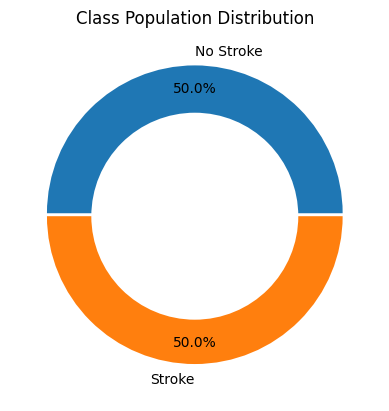

In [35]:
## after fixing the imbalances over stroke column
# Map targets to meaningful statements
classes = {
    'No Stroke': 0,
    'Stroke': 1
}
# Find the number of patients with/without heart disease
class_pop = [len(y_train == _class) for _class in classes.values()]

# Drawing a donut chart
plt.title('Class Population Distribution')
plt.pie(
    x=class_pop,
    labels=classes.keys(),
    autopct='%.1f%%',
    explode=[0.02, 0],
    pctdistance=0.85
)
center_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.show()

# Plotting Comparison Based Data Visualization of df_train data frame

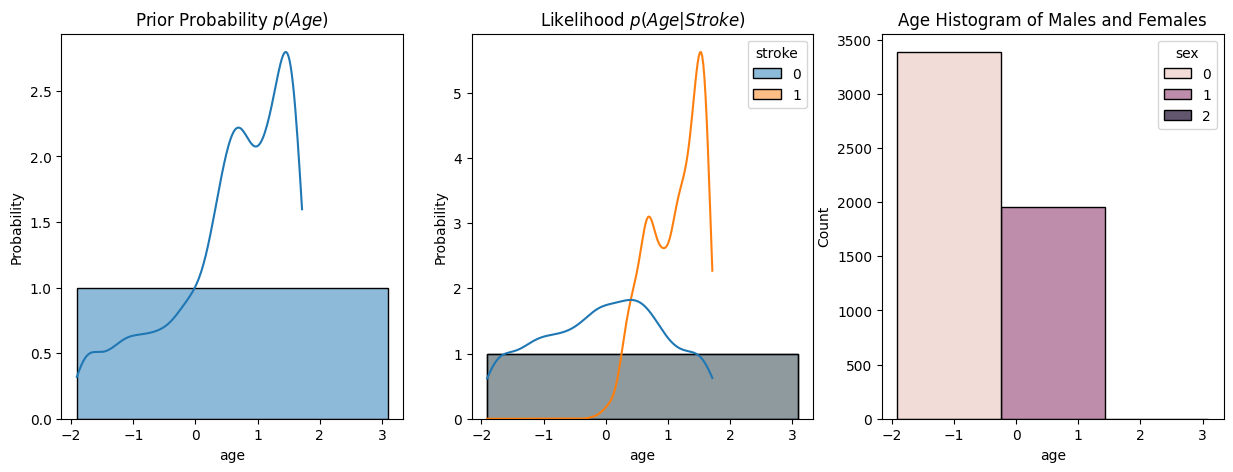

In [36]:
# Plotting multiple diagrams to figure out the distribution
#of age and also risk of Stroke in different ages after balancing the data set
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Prior Probability $p(Age)$')
sns.histplot(
    data=df_train, x='age',
    kde=True,
    binwidth=5, binrange=(df_train['age'].min(), df_train['age'].max()),
    stat='probability', common_norm=False,
    ax=axes[0]
)

plt.subplot(1, 3, 2)
plt.title(r'Likelihood $p(Age|Stroke)$')
sns.histplot(
    data=df_train, x='age',
    kde=True,
    binwidth=5, binrange=(df_train['age'].min(), df_train['age'].max()),
    hue='stroke',
    stat='probability', common_norm=False,
    ax=axes[1]
)

plt.subplot(1, 3, 3)
plt.title('Age Histogram of Males and Females')
sns.histplot(
    data=df_train, x='age',
    binwidth=5, binrange=(df_train['age'].min(), df_train['age'].max()),
    hue='sex',
    multiple='dodge',
    ax=axes[2]
)

plt.show()

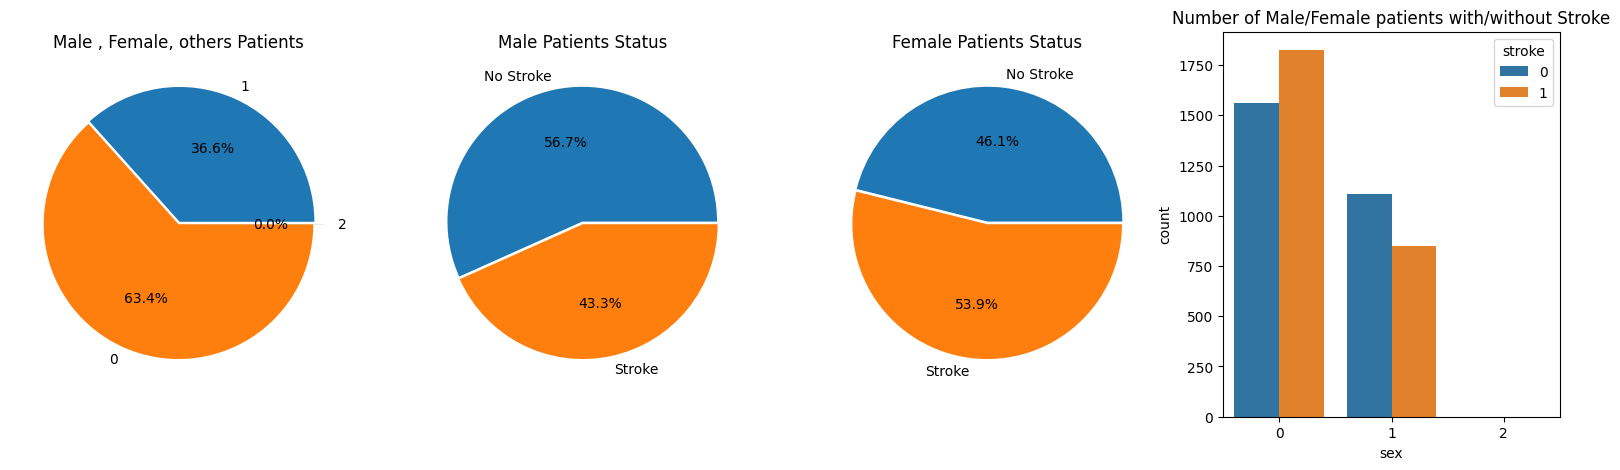

In [37]:
## ploting gender vs stroke to visualize the train dataset  after balancing
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

genders = df_train['sex'].unique()
gender_pop = [len(df_train[df_train['sex'] == _gender]) for _gender in genders]
plt.subplot(1, 4, 1)
plt.title('Male , Female, others Patients')
plt.pie(
    x=gender_pop,
    labels=genders,
    autopct='%.1f%%',
    explode=[0.02,0,.08],
)

# Status of male and female patients
male_stat = [len(df_train[(df_train['sex'] == 1) & (df_train['stroke'] == _class)]) for _class in classes.values()]
female_stat = [len(df_train[(df_train['sex'] == 0) & (df_train['stroke'] == _class)]) for _class in classes.values()]
plt.subplot(1, 4, 2)
plt.title('Male Patients Status')
plt.pie(
    x=male_stat,
    labels=classes.keys(),
    autopct='%.1f%%',
    explode=[0.02, 0],
)

plt.subplot(1, 4, 3)
plt.title('Female Patients Status')
plt.pie(
    x=female_stat,
    labels=classes.keys(),
    autopct='%.1f%%',
    explode=[0.02, 0],
)

plt.subplot(1, 4, 4)
plt.title('Number of Male/Female patients with/without Stroke')
sns.countplot(
    data=df_train, x='sex',
    hue='stroke',
    ax=axes[3]
)

plt.show()

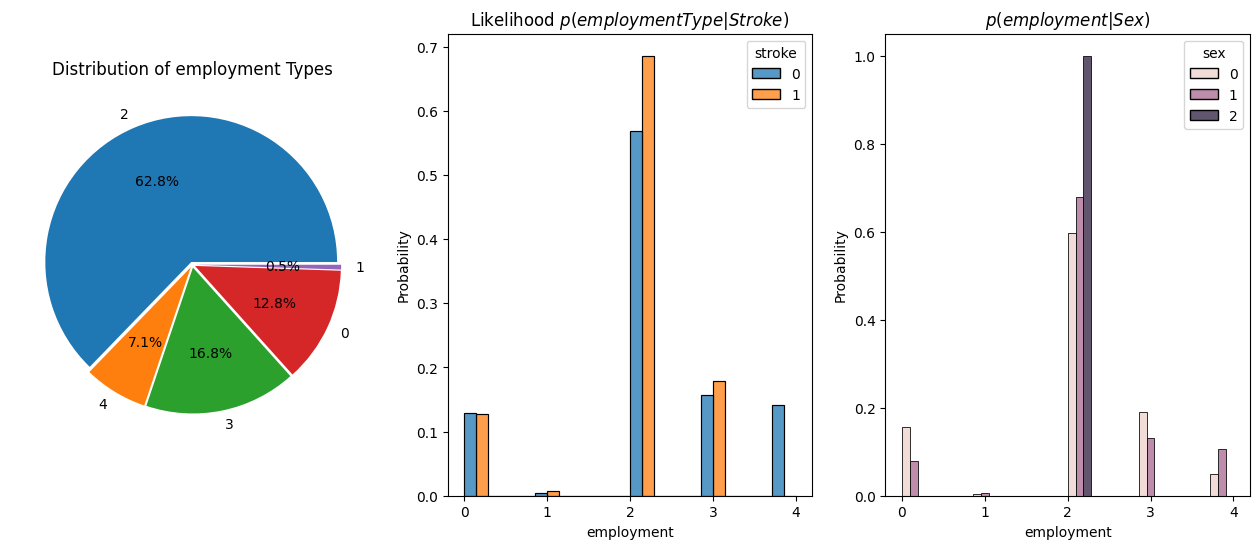

In [38]:
## ploting emloyement vs stroke according to sex of a person
#to visualize the train dataset  after balancing
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

pains = df_train['employment'].unique()
pains_pop = [len(df_train[df_train['employment'] == _pain]) for _pain in pains]

plt.subplot(1, 3, 1)
plt.title('Distribution of employment Types')
plt.pie(
    x=pains_pop,
    labels=pains,
    autopct='%.1f%%',
    explode=0.02 * np.ones(len(pains))
)

plt.subplot(1, 3, 2)
plt.title('Likelihood $p(employment Type|Stroke)$')
sns.histplot(
    data=df_train, x='employment',
    hue='stroke',
    stat='probability', common_norm=False,
    multiple='dodge',
    ax=axes[1]
)

plt.subplot(1, 3, 3)
plt.title('$p(employment|Sex)$')
sns.histplot(
    data=df_train, x='employment',
    hue='sex',
    stat='probability', common_norm=False,
    multiple='dodge',
    ax=axes[2]
)

plt.show()

#Applying Logistic Regression Classifier Algorithm On Tain Data

---



In [39]:
## creating a dictionary which will store the models accuracy
# initializing with zeros
models_accuracy = {'LR_MODEL': 0.0,'DT_MODEL':0.0,'RF_MODEL':0.0,'KNN_MODEL':0.0,'LR_Tuned_MODEL':0.0,'KNN_Tuned_MODEL':0.0}

In [40]:
# Apply Logistic Regression Algorithm

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

#Results from LogisticRegression Model

In [41]:
LR_score = LR.score(X_train, y_train)
LR_test = LR.score(X_test, y_test)

#testing model

y_pred = LR.predict(X_test)

#evaluation

cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))
models_accuracy['LR_MODEL'] = accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      2188
           1       0.12      0.72      0.21       112

    accuracy                           0.74      2300
   macro avg       0.55      0.73      0.53      2300
weighted avg       0.94      0.74      0.81      2300



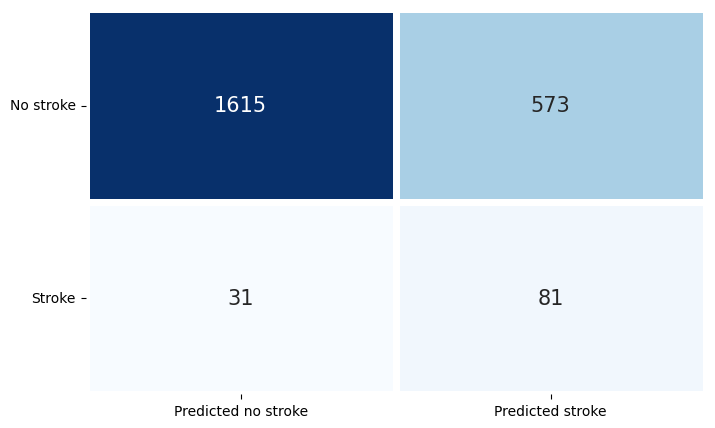

In [42]:
# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

#Applying Decesion Tree Classifier on the Train Data

In [43]:
## intialize the Decision Tree model
DT_model=DecisionTreeClassifier(max_depth=3, random_state=1)


#Results From DecisionTree Model and Visualize the Depth Of the Decision Tree

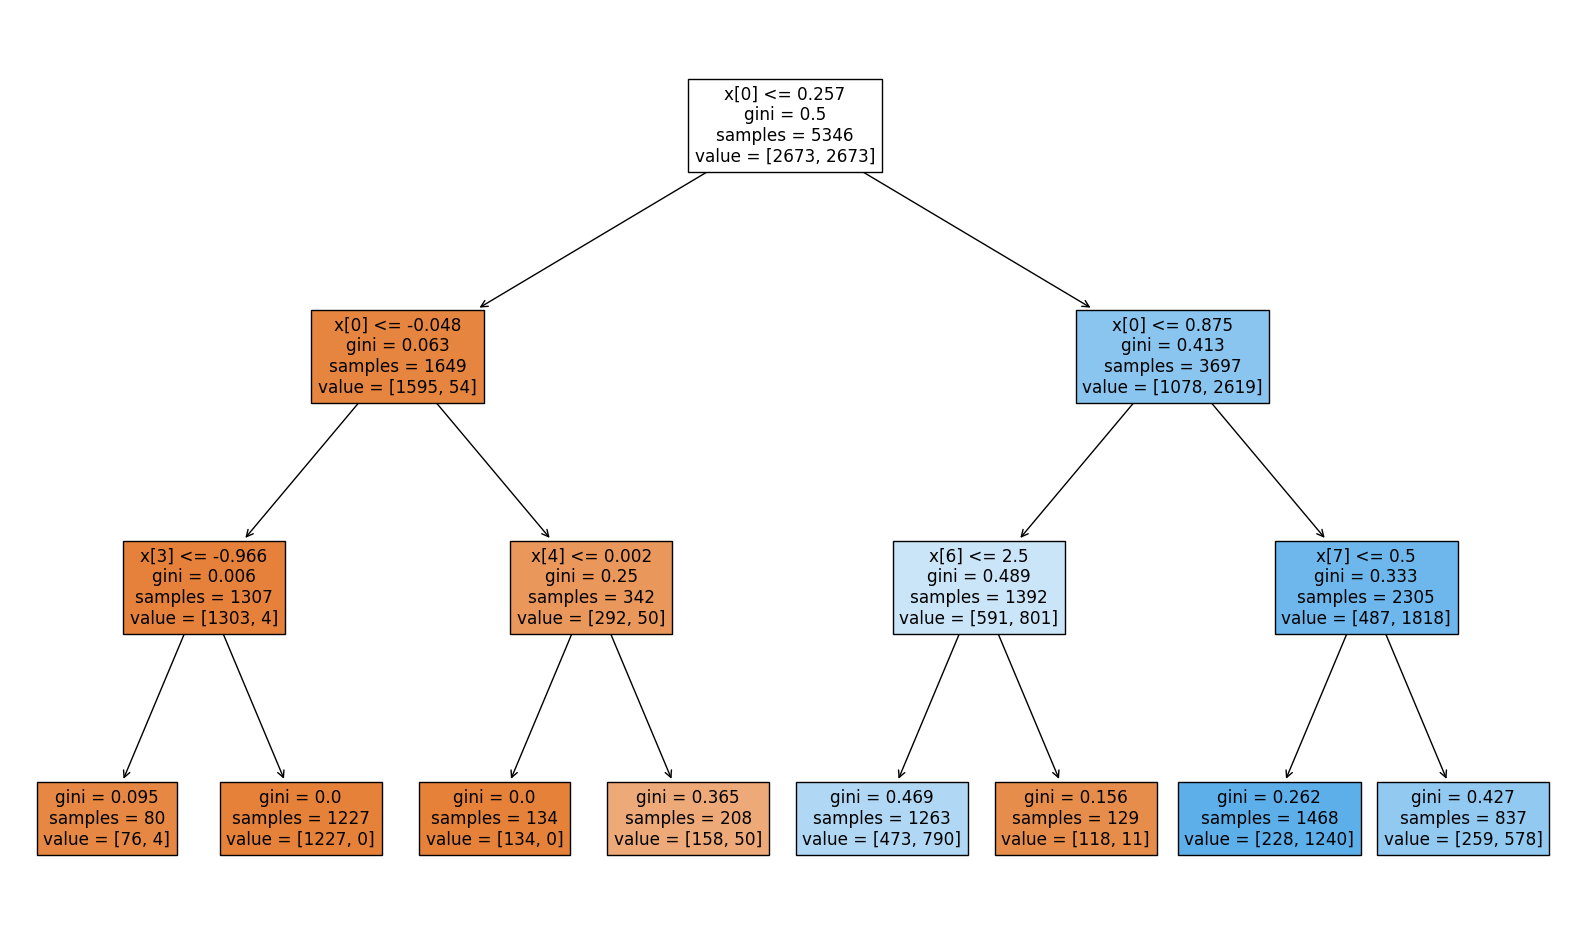

Test Accuracy 0.6360869565217391
Test Classification Report
               precision    recall  f1-score   support

           0       0.99      0.63      0.77      2188
           1       0.10      0.82      0.18       112

    accuracy                           0.64      2300
   macro avg       0.54      0.72      0.47      2300
weighted avg       0.94      0.64      0.74      2300



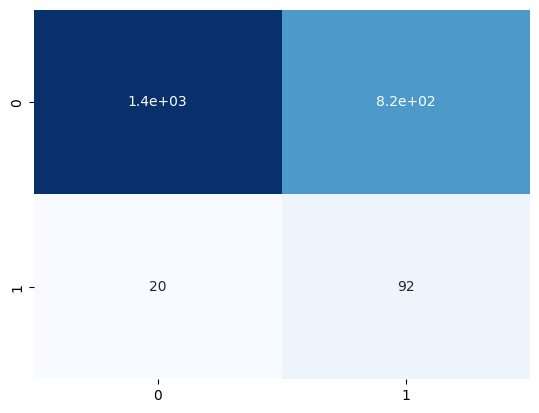

In [44]:
## train the decision tree model
DT_model.fit(X_train, y_train)
## ploting the deth of Decision tree model
plt.figure(figsize=(20, 12))
tree.plot_tree(DT_model, filled=True)
plt.show()
## testing the decision tree model
DT_ypred = DT_model.predict(X_test)
## printing accuracy of decision tree model
print("Test Accuracy", accuracy_score(y_test, DT_ypred))
print("Test Classification Report\n", classification_report(y_test,DT_ypred))
## illustrating the confusion matrix of decition tree model prediction
mat=confusion_matrix(y_test,DT_ypred)
models_accuracy['DT_MODEL']=accuracy_score(y_test,DT_ypred)
sns.heatmap(mat,annot=True, cbar=False,cmap="Blues")
plt.show()

#Applying The RandomForest Classifier to Train Data

In [45]:
## initializing the Random Forest Classifier
RFC_model = RandomForestClassifier(n_estimators = 100)

#Result From RandomForest Model

Test Accuracy 0.8726086956521739
Test Classification Report
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      2188
           1       0.11      0.24      0.16       112

    accuracy                           0.87      2300
   macro avg       0.54      0.57      0.54      2300
weighted avg       0.92      0.87      0.89      2300



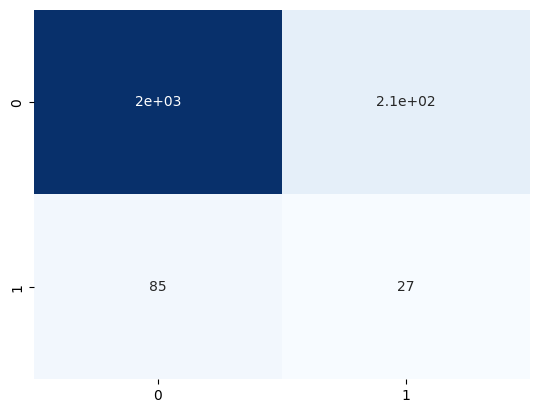

In [46]:
## Train the Random Forest model  with train dataset
RFC_model.fit(X_train, y_train)
## testing the Random Forest model
RFC_ypred = RFC_model.predict(X_test)
## printing the Accuracy of the model
print("Test Accuracy", accuracy_score(y_test, RFC_ypred))
print("Test Classification Report\n", classification_report(y_test,RFC_ypred))
## illustrating the confusion matrix for the prediction of the model
mat=confusion_matrix(y_test,RFC_ypred)
models_accuracy['RF_MODEL']=accuracy_score(y_test,RFC_ypred)
sns.heatmap(mat,annot=True, cbar=False,cmap="Blues")
plt.show()

#Applying The KNN Classifier to Train Data

In [47]:
#### initializing the KNN Classifier
KNN_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

#Result From KNN Model

Test Accuracy 0.79
Test Classification Report
               precision    recall  f1-score   support

           0       0.96      0.81      0.88      2188
           1       0.09      0.38      0.15       112

    accuracy                           0.79      2300
   macro avg       0.53      0.60      0.52      2300
weighted avg       0.92      0.79      0.84      2300



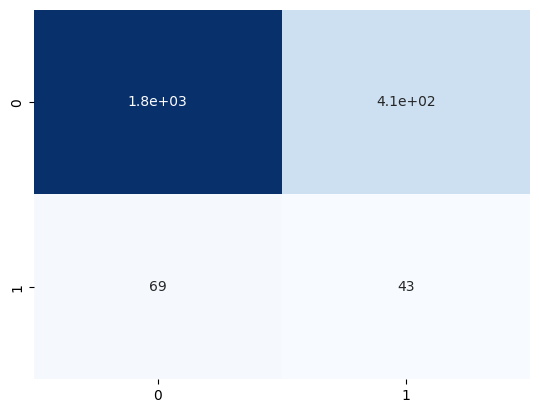

In [48]:
## Train the KNN model  with train dataset
KNN_model.fit(X_train, y_train)
## testing the KNN model with test dataset
KNN_ypred = KNN_model.predict(X_test)
## printing the accuracy of the prediction of KNN model
print("Test Accuracy", accuracy_score(y_test, KNN_ypred))
print("Test Classification Report\n", classification_report(y_test,KNN_ypred))
## illustrating the confusion matrix of KNN model prediction
mat=confusion_matrix(y_test,KNN_ypred)
models_accuracy['KNN_MODEL']= accuracy_score(y_test,KNN_ypred)
sns.heatmap(mat,annot=True, cbar=False,cmap="Blues")
plt.show()

#Comparing Among Model And Visualize Using Bar Chart


In [49]:
#Putting models in a dictionary
models= {"LR MODEL": LogisticRegression(),
        "KNN MODEL": KNeighborsClassifier(n_neighbors=5, metric='euclidean'),
         "RF MODEL": RandomForestClassifier(n_estimators = 100) ,
         "DT MODEL":DecisionTreeClassifier(max_depth=5, random_state=1),}

#Creating function to fit and score models

def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and Evaluates given ML model
    """
    np.random.seed(42)
    model_scores = {}

    #Loop through models
    for name,model in models.items():
        #Fit model to data
        model.fit(X_train,y_train)
        #Evaluate score in model_score
        model_scores[name]= model.score(X_test,y_test)

    return model_scores


In [50]:
## calling the user defined function to fit the models and get the scores
model_scores= fit_and_score(models=models
                            ,X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

print(model_scores)

{'LR MODEL': 0.7373913043478261, 'KNN MODEL': 0.79, 'RF MODEL': 0.8778260869565218, 'DT MODEL': 0.6773913043478261}


<Figure size 1000x600 with 0 Axes>

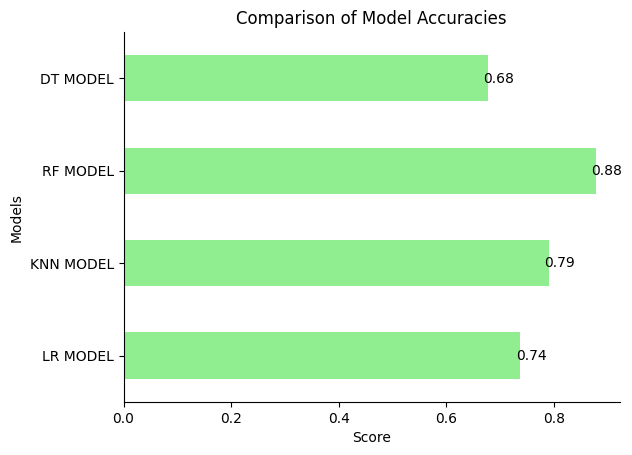

In [51]:
## creating a dataframe using pandas to illustrate the comparison on their scores
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the data using horizontal bar plot for better readability
ax = model_compare.transpose().plot(kind="barh", legend=False, color='lightgreen')

# Set labels and title
ax.set_xlabel("Score")
ax.set_ylabel("Models")
ax.set_title("Comparison of Model Accuracies")

# Remove top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Display the accuracy values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width() + 0.02, p.get_y() + p.get_height()/2),
                ha='center', va='center')

# Show the plot
plt.show()

# Tuning The Previous KNN Model For Better Accuracy
# Tunning Process Derived By Changing the HyperParameters

In [52]:
#Tuning KNN

train_scores= []
test_scores= []

#Create a list of values for n_neighbours

neighbors= range(1,21)
knn= KNeighborsClassifier()

#Loop through neighbours

for i in neighbors:
    knn.set_params(n_neighbors=i)

    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))

    test_scores.append(knn.score(X_test,y_test))

In [53]:
print(train_scores)

[1.0, 0.9900860456416012, 0.9496820052375607, 0.9508043396932285, 0.9210624766180322, 0.9272353161242051, 0.9055368499812945, 0.9102132435465768, 0.8931911709689487, 0.8982416760194538, 0.8849607182940517, 0.8877665544332211, 0.8772914328469884, 0.8832772166105499, 0.8735503179947625, 0.8786008230452675, 0.8709315375982043, 0.8761690983913206, 0.865132809577254, 0.8698092031425365]


#Comparison Between Previous KNN model and Tuned KNN model

Maximum KNN Score on test data : 87.00%


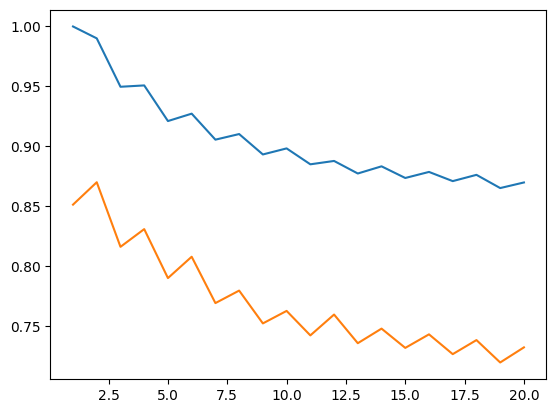

In [54]:
## comparing normal KNN with tuned KNN
plt.plot(neighbors,train_scores,label="Train Scores")
plt.plot(neighbors,test_scores,label="Test Scores")
print(f"Maximum KNN Score on test data : {max(test_scores)*100:.2f}%")
models_accuracy['KNN_Tuned_MODEL']=max(test_scores)

# Logistic Regression Model Tunning changing HyperParameters
# using GridSearchCV
GridSearchCV ->  It's a technique used for hyperparameter tuning in machine learning models. Hyperparameters are parameters that are set before the learning process begins, and they influence how a model learns and generalizes from the training data. GridSearchCV helps us find the best combination of hyperparameters for our model to achieve optimal performance.


In [55]:
log_reg_grid= {"C": np.logspace(-4,4,40),
               "solver": ["liblinear"]}

gs_log_reg= GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=7,
                        verbose= True)

gs_log_reg.fit(X_train,y_train)

Fitting 7 folds for each of 40 candidates, totalling 280 fits


GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.60371874e-04, 2.57191381e-04, 4.12462638e-04,
       6.61474064e-04, 1.06081836e-03, 1.70125428e-03, 2.72833338e-03,
       4.37547938e-03, 7.01703829e-03, 1.12533558e-02, 1.80472177e-02,
       2.89426612e-02, 4.64158883e-02, 7.44380301e-02, 1.19377664e-01,
       1.91448198e-01, 3.07029063e-01, 4.923882...652287e-01,
       1.26638017e+00, 2.03091762e+00, 3.25702066e+00, 5.22334507e+00,
       8.37677640e+00, 1.34339933e+01, 2.15443469e+01, 3.45510729e+01,
       5.54102033e+01, 8.88623816e+01, 1.42510267e+02, 2.28546386e+02,
       3.66524124e+02, 5.87801607e+02, 9.42668455e+02, 1.51177507e+03,
       2.42446202e+03, 3.88815518e+03, 6.23550734e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

#Results of Tuned Logistic Regression Model

In [56]:
gs_log_reg.score(X_test,y_test)

0.7373913043478261

In [57]:
y_preds= gs_log_reg.predict(X_test)

In [58]:
y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
y_test

2412    0
245     1
1560    0
126     1
4515    0
       ..
4768    0
4896    0
1658    0
2139    0
2242    0
Name: stroke, Length: 2300, dtype: int64

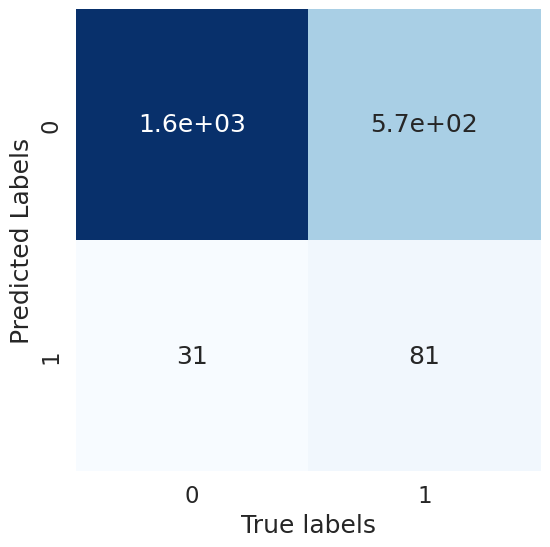

In [60]:
#Confusion Matrix
sns.set(font_scale=1.5)

## user defined function that takes the y_test , y_preds and gives the confusion
## matrix as output
def conf_mat(y_test,y_preds):

    fig,ax= plt.subplots(figsize=(6,6))

    ax= sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False,cmap="Blues")

    plt.xlabel("True labels")
    plt.ylabel("Predicted Labels")

conf_mat(y_test,y_preds)

In [61]:
print(classification_report(y_test,y_preds))
models_accuracy['LR_Tuned_MODEL']=accuracy_score(y_test,y_preds)

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      2188
           1       0.12      0.72      0.21       112

    accuracy                           0.74      2300
   macro avg       0.55      0.73      0.53      2300
weighted avg       0.94      0.74      0.81      2300



#Finally Compared All of the Models using Bar Plots

<Figure size 1000x600 with 0 Axes>

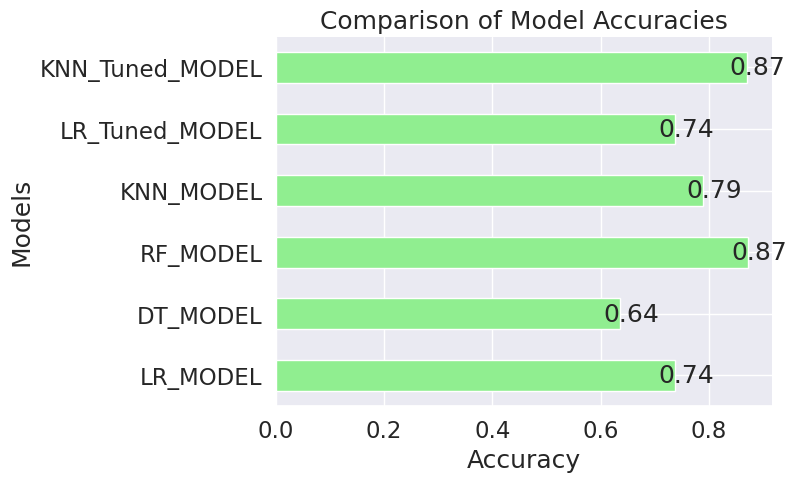

In [62]:
## creating a dataframe using pandas to illustrate the comparison
model_compare = pd.DataFrame(models_accuracy, index=["Accuracy"])

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the data using horizontal bar plot for better readability
ax = model_compare.transpose().plot(kind="barh", legend=False, color='lightgreen')

# Set labels and title
ax.set_xlabel("Accuracy")
ax.set_ylabel("Models")
ax.set_title("Comparison of Model Accuracies")

# Remove top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Display the accuracy values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width() + 0.02, p.get_y() + p.get_height()/2),
                ha='center', va='center')

# Show the plot
plt.show()


#Results
We Can Observe From the Bar Chart That KNN_Tuned_MODEL and RF_MODEL has the same
Accuracy For our dataset.
We Can Choose between any of the Models To Predict Stroke of a Person